<a href="https://colab.research.google.com/github/james-monahan/Code-school-notebooks/blob/main/Week-7-pandas-sql-plot%20/Seaborn_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)


# You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,1037,62.250,9,6,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,1040,58.125,8,6,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,1040,37.000,6,1,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,1040,42.625,5,1,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,1040,17.250,6,2,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :

## First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

There are lots of colors to chose from here : https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

Create a scatterplot :
- with max (in red) and min (in blue) temperatures on the same graph
- Y-axis for temperatures
- X-axis for dates
- Include legend, readable axis ticks, and title

Here is an example of what is expected :

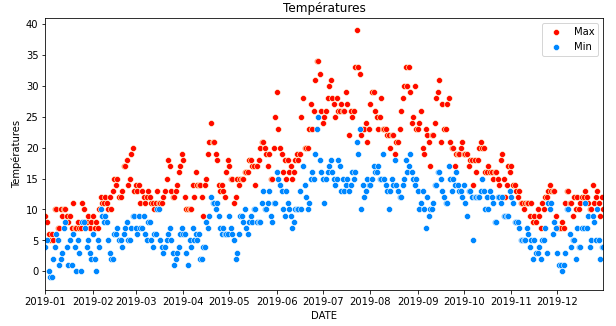


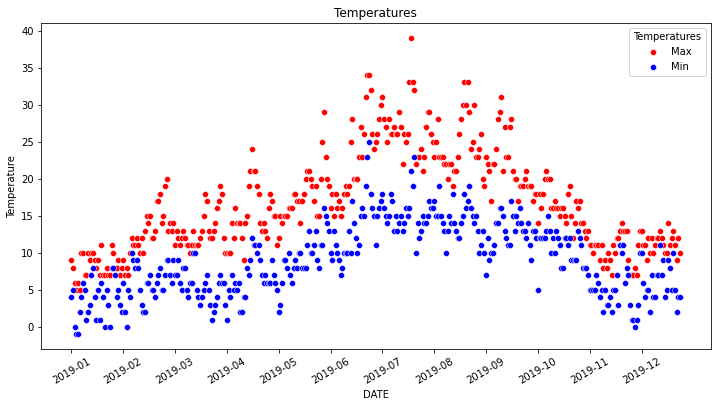

In [ ]:
# First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph
dates = pd.date_range('2019-01-01','2019-12-31', 
              freq='MS').strftime("%Y-%m").tolist()

plt.figure(figsize=(12,6))
sns.scatterplot(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], color = 'red') 
sns.scatterplot(x = df_weather["DATE"], y = df_weather["MIN_TEMPERATURE_C"], color = 'blue') 

plt.legend(['Max', 'Min'], title='Temperatures', loc='upper right')
plt.ylabel('Temperature')
plt.xticks(range(0,365,31), dates, rotation=30)
plt.title('Temperatures')

plt.show() 

## Colorize with hue argument, to show the criterias of the opinion columns

With Seaborn, you can use the "data" argument to indicate your DataFrame, syntax will be prettier.

Here is an example of what is expected :

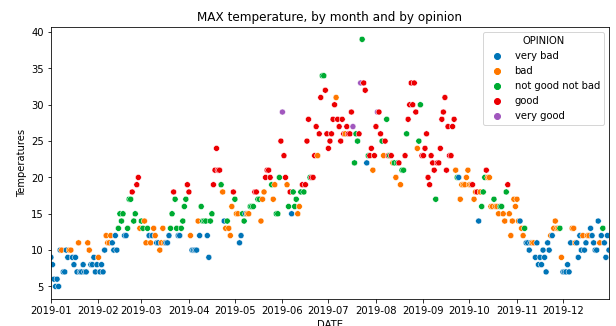

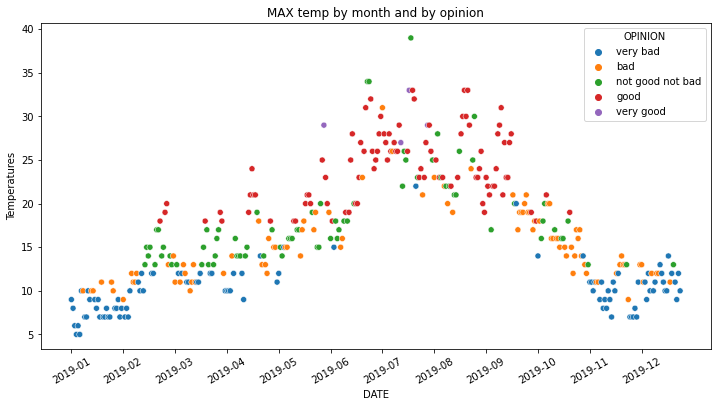

In [ ]:
# First of all, you have to create a scatterplot with max (in red) and min (in blue) temperatures located on the same graph

plt.figure(figsize=(12,6))
sns.scatterplot(x = df_weather["DATE"], y = df_weather["MAX_TEMPERATURE_C"], hue = df_weather['OPINION']) 
plt.ylabel('Temperatures')
plt.xticks(range(0,365,31), dates, rotation=30)
plt.title('MAX temp by month and by opinion')

plt.show() 


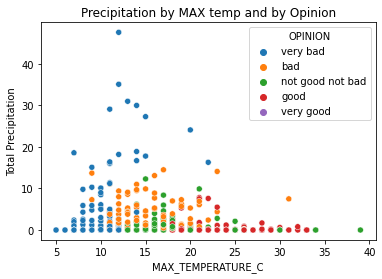

In [ ]:
# Let's try to implement more functions - what's hue?
sns.scatterplot(x = "MAX_TEMPERATURE_C", 
                y = "PRECIP_TOTAL_DAY_MM", 
                hue = 'OPINION', 
                data = df_weather) 

plt.title('Precipitation by MAX temp and by Opinion')
plt.ylabel('Total Precipitation')

plt.show()

# Yeah, it's pretty cool! Did you notice that the syntax has changed a little ? "data =" is used to call the DataFrame
# Now, try to colorize, using hue, a scatterplot with MAX temperature on the X axis, precipation (rain amount) on the Y axis, and colorize with 'opinion' values.

# Of course, you'll write legend, readable axis ticks, and title.

## Correlation coefficient and heatmap - change the palette and interpretation

For your information : https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/



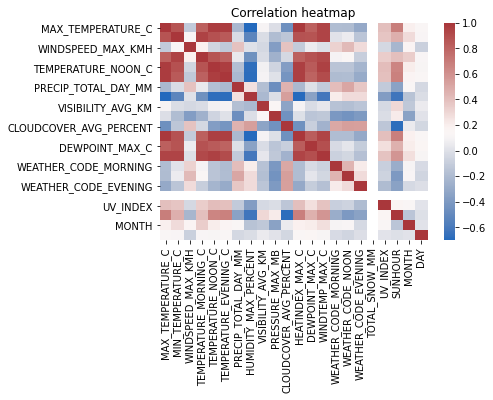

In [ ]:
# Try to execute the code below :
sns.heatmap(df_weather.corr(), 
            cmap = "vlag")
plt.title('Correlation heatmap')
plt.show()


**Wow! With only one line! Powerful!**

What does it mean ? Could you interpret this ? Why is the diagonal white ?

Could you find the two less correlated columns ? Be careful : the less correlated columns are those with a correlated coefficient close to 0, not -1.

Let's modify it to be more readable.
Please change the palette (cmap) to a more beautiful one. Chose a "diverging" palette in this page https://seaborn.pydata.org/tutorial/color_palettes.html

Then, please add a title of course.

Here is an example of what is expected :

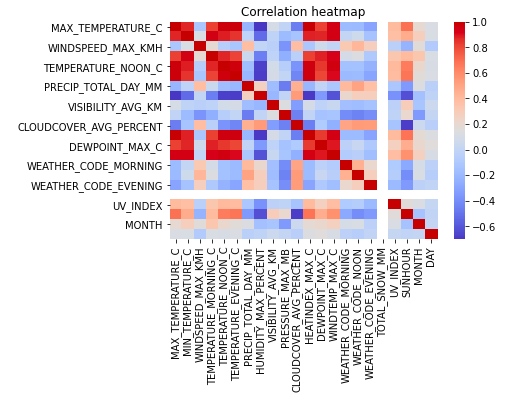

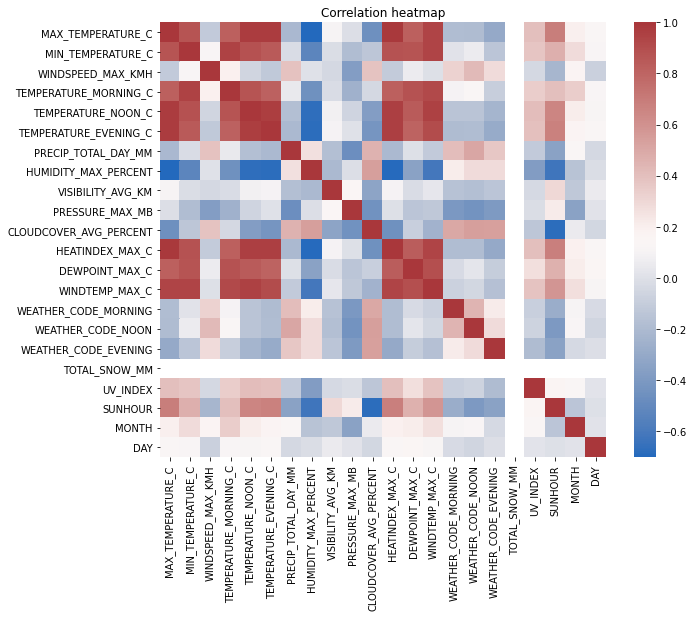

In [ ]:
# It's your turn now :
# Try to execute the code below :
plt.figure(figsize=(10,8))
sns.heatmap(df_weather.corr(), 
            cmap = "vlag")
plt.title('Correlation heatmap')
plt.show()

### Create a DataFrame with only high correlated columns with Max Temperature

In [ ]:
# Display a Serie with correlation coefficients with MAX_TEMPERATURE_C, sorted by value (you could use the .sorted_values() method)
# Wich are the 3 most correlated columns with MAX_TEMPERATURE_C ?

df_weather.corr()['MAX_TEMPERATURE_C'].nlargest(4)[1:4]

HEATINDEX_MAX_C          0.993324
TEMPERATURE_EVENING_C    0.976796
TEMPERATURE_NOON_C       0.975441
Name: MAX_TEMPERATURE_C, dtype: float64

## Pair Plot - Colorize the opinions
Another way, and more visual way, to see correlation, is just to plot each column 2 by 2, that's a pairplot.

In [ ]:
df_weather.columns

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'MONTH', 'DAY'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


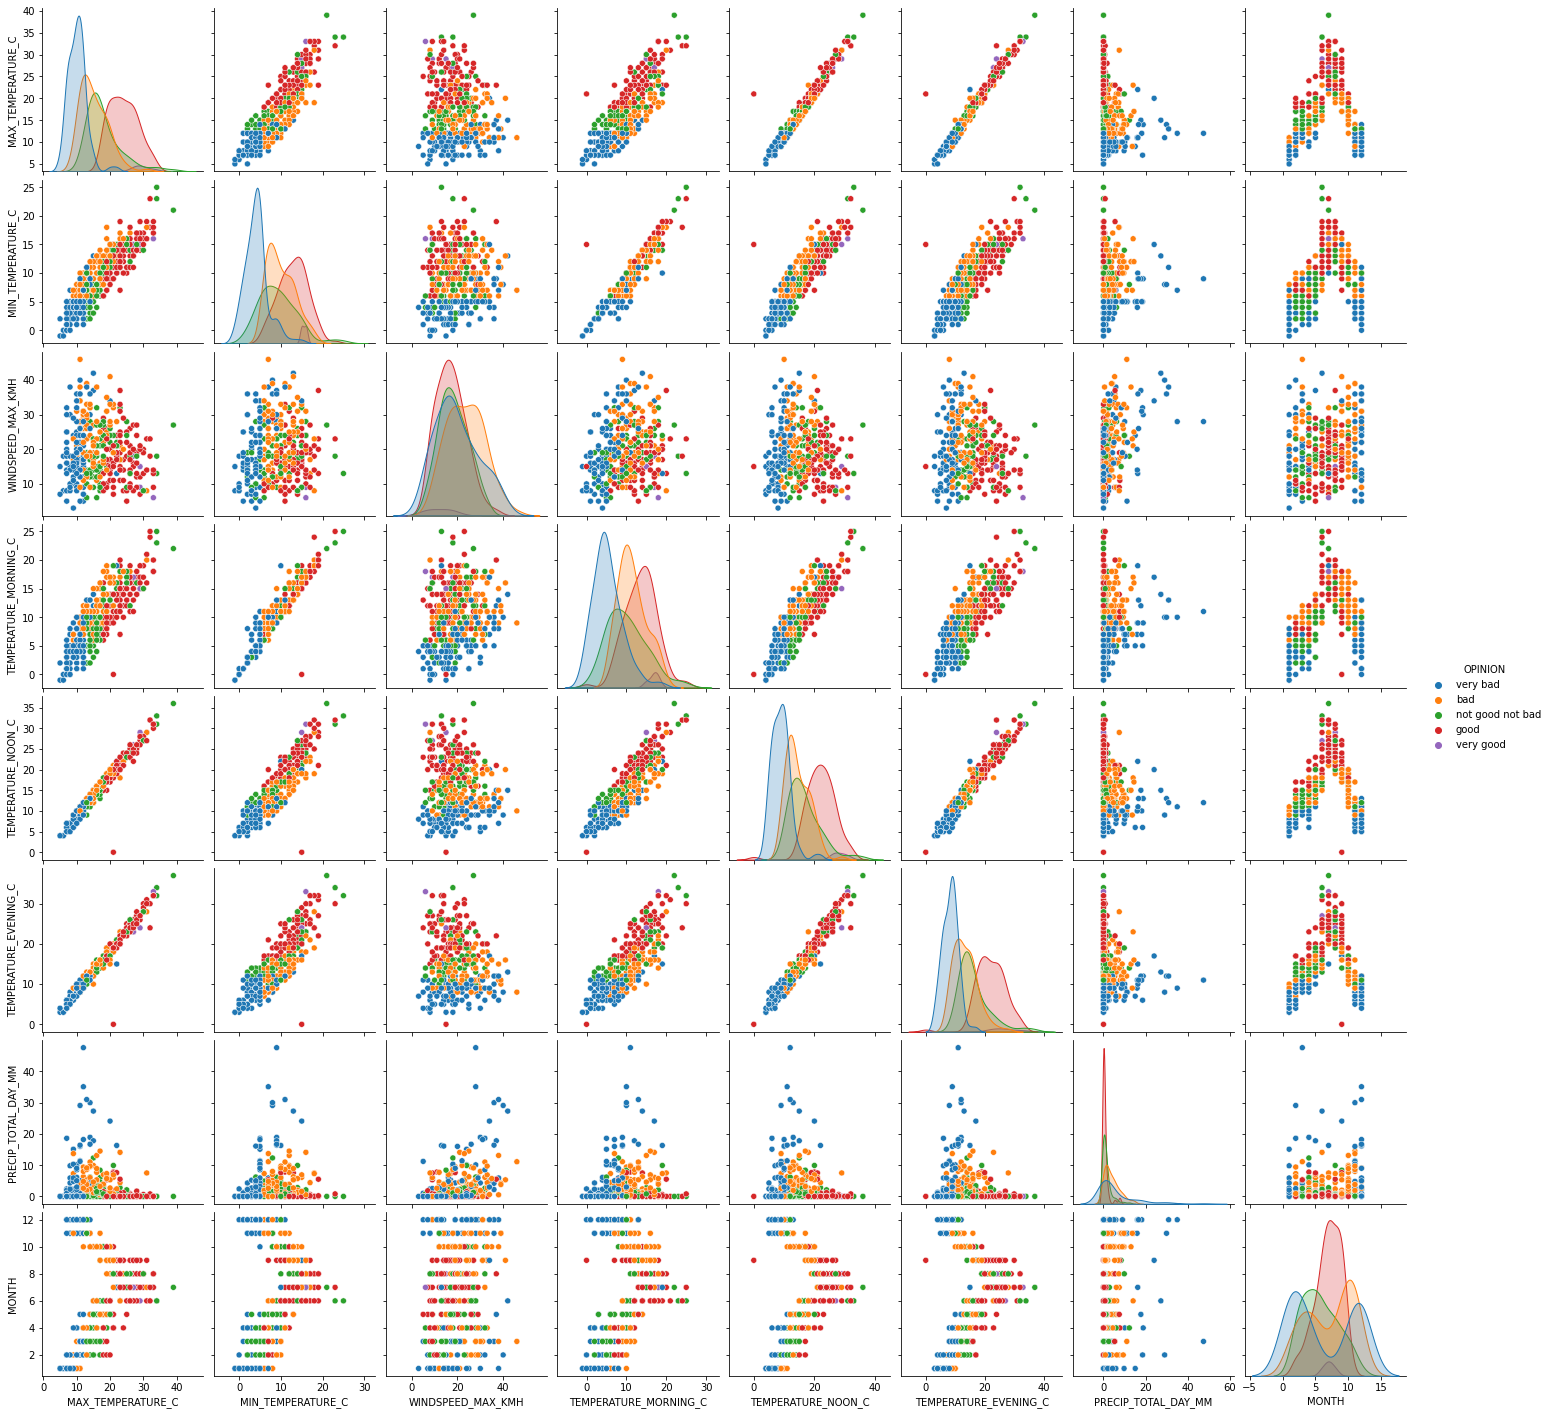

In [ ]:
# No, don't tell me it works in one line ? Of course it does!
sns.pairplot(pd.concat([df_weather.iloc[:,0:8],df_weather.iloc[:,-2], df_weather['OPINION']], axis = 1), hue='OPINION')
# Find a way to colorize your pairplot according to 'opinion'

### PairPlot only with highly correlated columns with Max Temperature

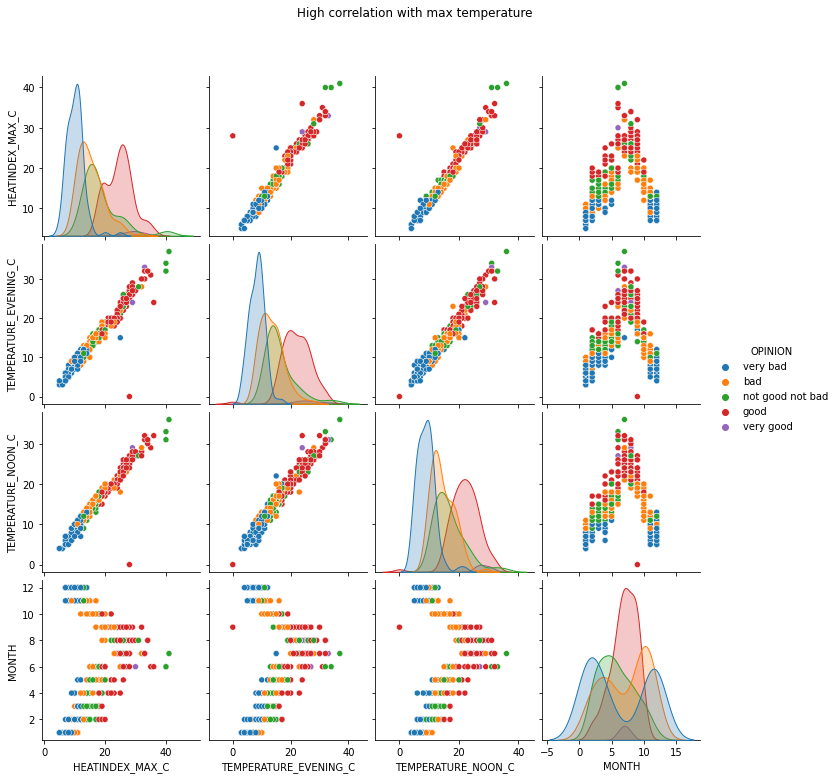

In [ ]:
# Now, let's plot a pairplot with only the 3 axis with high correlation with max temperature (you found these 3 columns before))
# And add the opinion's color, and of course a title. You can change the palette for a beautiful one.
high = list(df_weather.corr()['MAX_TEMPERATURE_C'].nlargest(4)[1:4].index)
high = high+['MONTH', 'OPINION']
g = sns.pairplot(df_weather[high], hue = 'OPINION')
g.fig.suptitle('High correlation with max temperature', y=1.08)
plt.show()


## Linear regression
Replace the axis with any better correlated axis of your choice

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


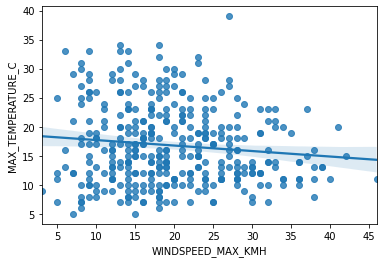

In [ ]:
# Again in one line ! 
sns.regplot('WINDSPEED_MAX_KMH', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()
# Hmmmmm. Yes, technicaly, it works... But max temperature and wind speed don't seem well correlated...
# Hey, but you know lots of well-correlated axis. That's the chance to try them out!

### Linear regression with 2 columns correlated

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


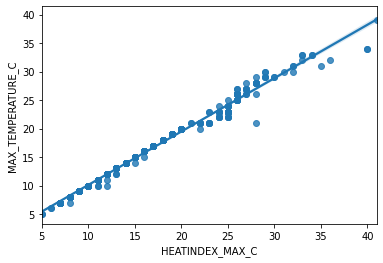

In [ ]:
sns.regplot('HEATINDEX_MAX_C', 'MAX_TEMPERATURE_C', data = df_weather)
plt.show()

# More and more...
Draw 2 different charts of your choice, on the same figure, to represent which season has better weather.  
  

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


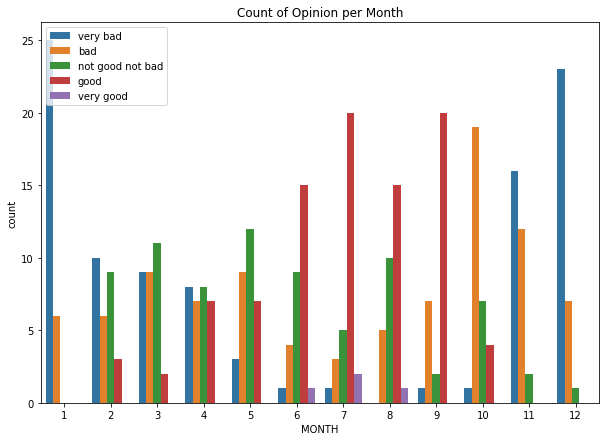

In [ ]:
#OPTION 1, easier to understand
plt.figure(figsize=(10,7))
sns.countplot('MONTH', hue='OPINION',  data= df_weather)
#sns.boxplot("MONTH", 'MAX_TEMPERATURE_C', data=df_weather)

plt.legend(loc='upper left')
plt.title('Count of Opinion per Month')
plt.show()

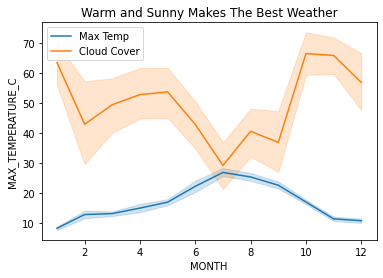

In [ ]:
#OPTION 2, Two on Same Figure, but harder to understand I think

sns.lineplot(x='MONTH', y='MAX_TEMPERATURE_C', data= df_weather, label='Max Temp')
sns.lineplot(x='MONTH', y='CLOUDCOVER_AVG_PERCENT', data= df_weather, label='Cloud Cover')
plt.title('Warm and Sunny Makes The Best Weather')
plt.show()


# Is it summer? Wow, you're the best! Now, challenge yourself with the other Seaborn quests.